<h3>Домашнее задание</h3>

<ol>
<li>К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.</li>
<li>*Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).</li>
<li>*Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).</li>
</ol>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X,y=load_iris(return_X_y=True)

In [3]:
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X=X[:,:2]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

X_train.shape, X_test.shape

((120, 2), (30, 2))

In [5]:
X_train

array([[5.1, 3.7],
       [4.6, 3.2],
       [6.9, 3.1],
       [5.5, 2.6],
       [5.6, 2.9],
       [6. , 3.4],
       [6.3, 2.3],
       [6. , 2.2],
       [6.3, 3.4],
       [6.9, 3.1],
       [6.7, 3. ],
       [5. , 3.2],
       [5.4, 3. ],
       [6. , 2.7],
       [6.3, 2.9],
       [4.8, 3.4],
       [6.7, 2.5],
       [6.2, 2.2],
       [5.6, 2.7],
       [5. , 3.4],
       [4.7, 3.2],
       [6.3, 2.7],
       [6.8, 3.2],
       [5.7, 2.8],
       [5.8, 2.7],
       [6.4, 2.8],
       [4.4, 3. ],
       [4.7, 3.2],
       [6.7, 3.1],
       [5.1, 3.4],
       [5.5, 4.2],
       [5.4, 3.4],
       [4.9, 3. ],
       [6.5, 3. ],
       [5.8, 4. ],
       [5.5, 2.4],
       [6.7, 3.3],
       [5.9, 3. ],
       [6.3, 2.5],
       [7.7, 2.8],
       [6.3, 2.5],
       [6. , 2.9],
       [6.3, 2.8],
       [7.7, 3. ],
       [6.2, 2.9],
       [6.7, 3.1],
       [5.8, 2.8],
       [5.8, 2.7],
       [5.7, 2.8],
       [5.1, 3.8],
       [6.3, 3.3],
       [5.2, 3.4],
       [6.5,

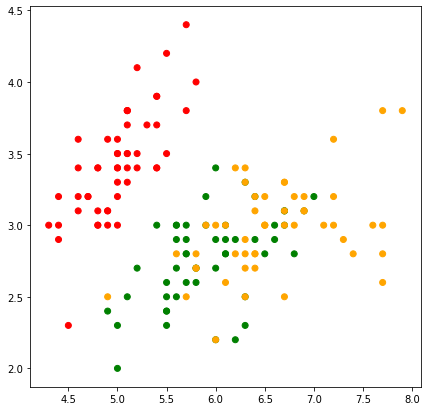

In [6]:
cmap=ListedColormap(['red','green','orange'])
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap)
plt.show()

In [7]:
#Расчет Евклидова расстояния
def e_metrics(x1,x2):
    distance=np.sum(np.square(x1-x2))
        
    return np.sqrt(distance)

In [8]:
#Функция реализации весов через номер соседа. ДЗ 1
def neighbor_weight(q,neighbors_list):
    some_dict={}
    for element in enumerate(neighbors_list,1):
        if element[1][1] not in some_dict:
            some_dict[element[1][1]]=0
        some_dict[element[1][1]]+=q**element[0]
    return some_dict

In [9]:
#Оптимизирована функция knn
def knn(x_train,y_train,x_test,k,q=False):
    answers=[]
    
    for object_ in x_test:
        distance_list=[]
        classes={}

        #Находим расстояние от каждого объекта тестовой выборки до всех точек тренировочного сета
        for i in range(len(x_train)): 
            distance=e_metrics(object_,x_train[i])
            distance_list.append((distance,y_train[i]))
        
        #Сортируем список
        distance_list.sort()
        
        #Если q задан на входе, находим веса каждого класса
        if q:
            classes=neighbor_weight(q,distance_list[:k])
        #Если q не задан, расчет производим исходя из частоты класса
        else:
            for value,key in distance_list[:k]:
                if key not in classes:
                    classes[key]=0
                classes[key]+=1
            
        #Выбор целевого класса    
        target_class=max(classes,key=classes.get)
        answers.append(target_class)
    
    return answers

In [10]:
#Функция расчета точности
def accuracy(y_pred,y_real):
    return sum(y_pred==y_real)/len(y_real)

In [11]:
#Запуск классического варианта knn
y_pred=knn(X_train,y_train,X_test,5)

In [12]:
#Расчет точности для классического варианта
accuracy(y_pred,y_test)

0.7333333333333333

In [13]:
#Запуск варианта knn с весами
y_pred_w=knn(X_train,y_train,X_test,5,0.5)

In [14]:
accuracy(y_pred_w,y_test)

0.7

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов

In [ ]:
#См. выше